# 🚲 Understanding Bike Sharing Behavior
================================================================== <br />
Jessica Gunther

## 📊 Dataset: 
* https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset
* 17K+ records over a 2 year period containing hourly environmental, season and user count data
* Records from Capital Bikeshare in 2011 and 2012 (the D.C. metro area bikesharing system)

## ✅ Outline of Analysis:
* **Phase 1: Preprocessing**
    * Understanding of dataframe, attributes and missing values
    * Creation of new attributes where necessary and/or beneficial to analysis
    * Review of summary statistics
* **Phase 2: User Count Analysis**
    * Understanding attribute relationships with user count values using matplotlib
* **Phase 3: Weather Analysis**
    * Look at weather attributes over temporal attributes (how does weather change by month, hour, season, year)
* **Phase 4: Top Rider Days**
    * Show days with top riders by year and overall
* **Phase 5: Show Correlations**
* **Phase 6: Conclusions and Discussion**
    * Discussion of main findings, business suggestions and future work

## Phase 1: Preprocessing

* Function to output the number of records in the dataset
* Function to read the csv into a dataframe
* Data cleaning and attribute transformation: 
    * Removal of non-relevant attributes (unique instance identifier column)
    * Conversion of season, yr, mnth, holiday, weekday and workingday to nominal values
    * Function to denormalize temperature attributes and convert from Celsius to Fahrenheit
* Function to view summary stats

In [153]:
import csv
import pandas as pd

In [156]:
#function to find number of records in the dataset using CSV reader

def record_num(filepath):
    """function to find number of records in the dataset using CSV reader"""

    infile_name = filepath
    with open(infile_name, "r", newline='') as infile:
        reader= csv.reader(infile)
        p = -1
        for row in reader:
            p += 1
    infile.close()
    return(p)

print('Number of records: {}'.format(record_num("hour.csv")))


Number of records: 17379


In [124]:
#function to read a csv into a pandas dataframe

def dataframe(filepath):
    """function to read a csv into a pandas dataframe"""
    f = pd.read_csv(filepath)
    return f

data = dataframe("hour.csv")


In [125]:
#concise overview of the data columns and types

#remove instant (unique identifier)
data.pop('instant')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB
None


* there are no null values in the data set
* there are 16 columns in the dataset that I will use for my analyis

In [126]:
# the dataset uses lots of numeric substitutes for attributes that could be nominal (for example,
# 0 in the season column represents winter). To make the data more legible, I would like to convert
# season, yr, mnth, holiday, weekday and workingday to nominal values (see next cell)
#I would also like to denormalize the temp and atemp attributes 
#and then convert that value from Celsius to Farhenheit so that
#the visualizations are easier to understand
    
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,1,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2011-01-01,1,0,1,1,1,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,2011-01-01,1,0,1,2,1,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,2011-01-01,1,0,1,3,1,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,2011-01-01,1,0,1,4,1,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [127]:
#convert season columns to nominal and yr to nominal years
for i in range(len(data)):
    if data.loc[i, 'season'] == 1:
        data.loc[i, 'season'] = 'winter'
    if data.loc[i, 'season'] == 2:
        data.loc[i, 'season'] = 'spring'
    if data.loc[i, 'season'] == 3:
        data.loc[i, 'season'] = 'summer'
    if data.loc[i, 'season'] == 4:
        data.loc[i, 'season'] = 'fall'
    if data.loc[i, 'yr'] == 0:
        data.loc[i, 'yr'] = '2011'
    if data.loc[i, 'yr'] == 1:
        data.loc[i, 'yr'] = '2012'

In [128]:
#convert months to nominal
for i in range(len(data)):
    if data.loc[i, 'mnth'] == 1:
        data.loc[i, 'mnth'] = 'January'
    if data.loc[i, 'mnth'] == 2:
        data.loc[i, 'mnth'] = 'February'
    if data.loc[i, 'mnth'] == 3:
        data.loc[i, 'mnth'] = 'March'
    if data.loc[i, 'mnth'] == 4:
        data.loc[i, 'mnth'] = 'April'
    if data.loc[i, 'mnth'] == 5:
        data.loc[i, 'mnth'] = 'May'
    if data.loc[i, 'mnth'] == 6:
        data.loc[i, 'mnth'] = 'June'
    if data.loc[i, 'mnth'] == 7:
        data.loc[i, 'mnth'] = 'July'
    if data.loc[i, 'mnth'] == 8:
        data.loc[i, 'mnth'] = 'August'
    if data.loc[i, 'mnth'] == 9:
        data.loc[i, 'mnth'] = 'September'
    if data.loc[i, 'mnth'] == 10:
        data.loc[i, 'mnth'] = 'October'
    if data.loc[i, 'mnth'] == 11:
        data.loc[i, 'mnth'] = 'November'
    if data.loc[i, 'mnth'] == 12:
        data.loc[i, 'mnth'] = 'December'

In [129]:
#convert workingday to nominal
for i in range(len(data)):
    if data.loc[i, 'holiday'] == 1 or data.loc[i, 'weekday'] == 0 or data.loc[i, 'weekday'] == 6:
        data.loc[i, 'workingday'] = 'no'
    else:
        data.loc[i, 'workingday'] = 'yes'

In [130]:
#convert holiday to nominal
for i in range(len(data)):
    if data.loc[i, 'holiday'] == 1:
        data.loc[i, 'holiday'] = 'yes'
    else:
        data.loc[i, 'holiday'] = 'no'

In [131]:
#convert weekday to nominal
for i in range(len(data)):
    if data.loc[i, 'weekday'] == 0:
        data.loc[i, 'weekday'] = 'Sunday'
    if data.loc[i, 'weekday'] == 1:
        data.loc[i, 'weekday'] = 'Monday'
    if data.loc[i, 'weekday'] == 2:
        data.loc[i, 'weekday'] = 'Tuesday'
    if data.loc[i, 'weekday'] == 3:
        data.loc[i, 'weekday'] = 'Wednesday'
    if data.loc[i, 'weekday'] == 4:
        data.loc[i, 'weekday'] = 'Thursday'
    if data.loc[i, 'weekday'] == 5:
        data.loc[i, 'weekday'] = 'Friday'
    if data.loc[i, 'weekday'] == 6:
        data.loc[i, 'weekday'] = 'Saturday'
        

In [132]:

def convert(mins, maxs, norm):
    """function to denormalize temperature attributes and convert from C to F
    function takes as input a min value and max value (retrieved from the
    UCI Machine Learning Repository dataset page) and the normalized score
    and gives as output the temp in F
    """
    c = (norm * (maxs - mins)) + mins
    f = ((c / 5) * 9) + 32
    return f


#denormalize and convert each temp value
new_temps = []
for i in range(len(data)):
    f = convert(-8, 39, data.loc[i, 'temp'])
    new_temps.append(f.round())

#denormalize and convert each atemp value
new_atemps = []
for i in range(len(data)):
    f = convert(-8, 39, data.loc[i, 'atemp'])
    new_atemps.append(f.round())
    
data['temp'] = new_temps
data['atemp'] = new_atemps

In [133]:
#new output for data types after attribute changes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  object 
 2   yr          17379 non-null  object 
 3   mnth        17379 non-null  object 
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  object 
 6   weekday     17379 non-null  object 
 7   workingday  17379 non-null  object 
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(5), object(7)
memory usage: 2.1+ MB


In [134]:
data

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,winter,2011,January,0,yes,Saturday,no,1,38.0,42.0,0.81,0.0000,3,13,16
1,2011-01-01,winter,2011,January,1,yes,Saturday,no,1,36.0,41.0,0.80,0.0000,8,32,40
2,2011-01-01,winter,2011,January,2,yes,Saturday,no,1,36.0,41.0,0.80,0.0000,5,27,32
3,2011-01-01,winter,2011,January,3,yes,Saturday,no,1,38.0,42.0,0.75,0.0000,3,10,13
4,2011-01-01,winter,2011,January,4,yes,Saturday,no,1,38.0,42.0,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,2012-12-31,winter,2012,December,19,no,Monday,yes,2,40.0,39.0,0.60,0.1642,11,108,119
17375,2012-12-31,winter,2012,December,20,no,Monday,yes,2,40.0,39.0,0.60,0.1642,8,81,89
17376,2012-12-31,winter,2012,December,21,no,Monday,yes,1,40.0,39.0,0.60,0.1642,7,83,90
17377,2012-12-31,winter,2012,December,22,no,Monday,yes,1,40.0,41.0,0.56,0.1343,13,48,61


In [135]:
from pandas.api.types import is_numeric_dtype

def sum_stats(m, x):
    """function to return summary stats for each column in a dataframe
    function takes as input a dataframe (m) and a series (x) which 
    should contain the column titles as index and the data type as
    the value; the function outputs descriptive stats if the columns
    is of the numeric data type and outputs unique value counts if
    the data type is object.
    """
    for i in range(len(x)):
        if x[i] == 'object' and x.index[i] != 'dteday':
            print('{}: object'.format(x.index[i]))
            print(m[x.index[i]].value_counts())
            print()
        if x[i] == 'int64' or x[i] == 'float64':
            print('{}: numeric'.format(x.index[i]))
            print(m[x.index[i]].describe())
            print()
    

data_types = data.dtypes

sum_stats(data, data_types)

season: object
summer    4496
spring    4409
winter    4242
fall      4232
Name: season, dtype: int64

yr: object
2012    8734
2011    8645
Name: yr, dtype: int64

mnth: object
May          1488
July         1488
December     1483
August       1475
March        1473
October      1451
June         1440
November     1437
April        1437
September    1437
January      1429
February     1341
Name: mnth, dtype: int64

hr: numeric
count    17379.000000
mean        11.546752
std          6.914405
min          0.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         23.000000
Name: hr, dtype: float64

holiday: object
no     16808
yes      571
Name: holiday, dtype: int64

weekday: object
Saturday     2512
Sunday       2502
Friday       2487
Monday       2479
Wednesday    2475
Thursday     2471
Tuesday      2453
Name: weekday, dtype: int64

workingday: object
yes    11889
no      5490
Name: workingday, dtype: int64

weathersit: numeric
count    17379.000000
mean  

### Discussion of Summary Stats
* As expected, attributes like season, year, month, hour and weekday are evenly distributed and there are far more workingdays than holidays and weekends recorded (good gut check to see that the data looks how it should)
* At any given time, there are usually more registered than casual users using bikes
* Avg. temperature over the two years was 59.66 F
* Avg feeling temperature over the two years was 57.84 F
* Avg. riders per hour over the course of the two years was 189

## Phase 2: User Count Analysis

* Function to output total number of users by type
* Tables and figures to show user count averages per hour aggregated by season, year, month, weekday, hour, holiday, 
    workingday, weathersit, temp, feeling temp, humidity and windspeed
* Figures to show user counts total YOY

In [136]:
#prints total counts for registered and casual users


def user_counts(df, name):
    """function that takes as input a string and a dataframe and outputs a
    sentence with the sum of the column in the dataframe that matches the string"""
    print('Total {} users: {}'.format(name, df[name].sum()))
    return

user_counts(data, 'cnt')
user_counts(data, 'registered')
user_counts(data, 'casual')

Total cnt users: 3292679
Total registered users: 2672662
Total casual users: 620017


In [137]:
#User Count Tables

from IPython.core.display import HTML

#below function source: https://github.com/epmoyer/ipy_table/issues/24
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

#users grouped by season
season = data.groupby('season')[['cnt', 'registered', 'casual']].mean()
season = season.reindex(index = ['winter', 'spring', 'summer', 'fall'])

#users grouped by year
year = data.groupby('yr')[['cnt', 'registered', 'casual']].mean()

#users grouped by month
month = data.groupby('mnth')[['cnt', 'registered', 'casual']].mean()
month = month.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

#users grouped by weekday
weekday = data.groupby('weekday')[['cnt', 'registered', 'casual']].mean()
weekday = weekday.reindex(index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

#users grouped by hour
hour = data.groupby('hr')[['cnt', 'registered', 'casual']].mean()
hour = hour.round()

#users grouped by holiday
holiday = data.groupby('holiday')[['cnt', 'registered', 'casual']].mean()
holiday = holiday.round()

#users grouped by workingday
workingday = data.groupby('workingday')[['cnt', 'registered', 'casual']].mean()
workingday = workingday.round()

#users grouped by weathersit
weathersit = data.groupby('weathersit')[['cnt', 'registered', 'casual']].mean()
weathersit = weathersit.round()

#users grouped by temp
temp = data.groupby('temp')[['cnt', 'casual', 'registered']].mean()

#users grouped by feeling temp
atemp = data.groupby('atemp')[['cnt', 'casual', 'registered']].mean()

#users grouped by hum
hum = data.groupby('hum')[['cnt', 'casual', 'registered']].mean()

#users grouped by windspeed
windspeed = data.groupby('windspeed')[['cnt', 'casual', 'registered']].mean()


display(multi_table([season.round(), year.round(), holiday, workingday]))
display(multi_table([month.round(), weekday.round(), weathersit]))


,cnt,registered,casual
season,,,
winter,111.0,97.0,14.0
spring,208.0,162.0,46.0
summer,236.0,186.0,50.0
fall,199.0,168.0,31.0
,cnt,registered,casual
yr,,,
2011,144.0,115.0,29.0
2012,235.0,192.0,43.0
,cnt,registered,casual


,cnt,registered,casual
mnth,,,
January,94.0,86.0,8.0
February,113.0,102.0,11.0
March,155.0,125.0,30.0
April,187.0,145.0,42.0
May,223.0,172.0,51.0
June,241.0,189.0,51.0
July,232.0,179.0,53.0
August,238.0,189.0,49.0
September,241.0,192.0,49.0


					Avg. User Counts


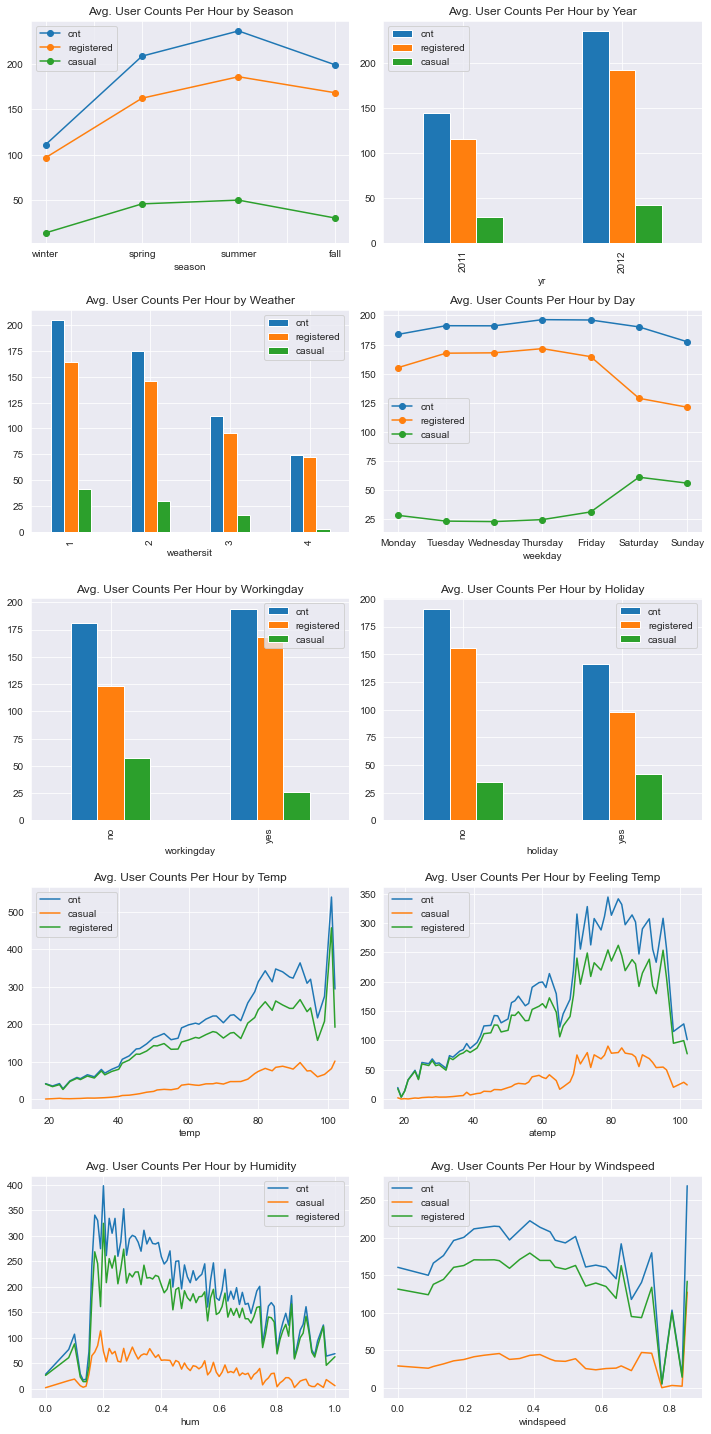

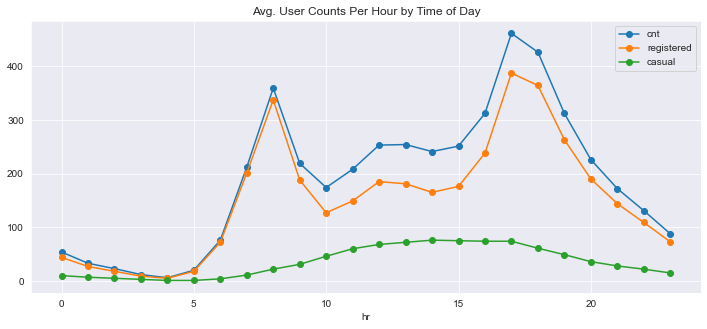

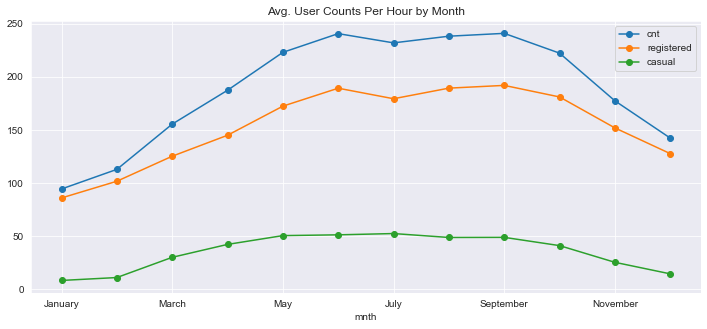

In [138]:
#plot above dataframes in a figure

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

fig, name = plt.subplots(5,2, figsize=(10,20))
season.plot(ax=name[0,0], title = 'Avg. User Counts Per Hour by Season', marker = 'o')
year.plot(ax=name[0,1], title = 'Avg. User Counts Per Hour by Year', kind = 'bar')
weathersit.plot(ax=name[1,0], title = 'Avg. User Counts Per Hour by Weather', kind = 'bar')
weekday.plot(ax=name[1,1], title = 'Avg. User Counts Per Hour by Day', marker = 'o')
workingday.plot(ax=name[2,0], title = 'Avg. User Counts Per Hour by Workingday', kind = 'bar')
holiday.plot(ax=name[2,1], title = 'Avg. User Counts Per Hour by Holiday', kind = 'bar')
temp.plot(ax=name[3,0], title = 'Avg. User Counts Per Hour by Temp')
atemp.plot(ax=name[3,1], title = 'Avg. User Counts Per Hour by Feeling Temp')
hum.plot(ax=name[4,0], title = 'Avg. User Counts Per Hour by Humidity')
windspeed.plot(ax=name[4,1], title = 'Avg. User Counts Per Hour by Windspeed')

print('\t\t\t\t\tAvg. User Counts')
print('=================='*5)
plt.show(fig.tight_layout(pad=1.0))

plt.show(hour.plot(figsize =(12,5), title = 'Avg. User Counts Per Hour by Time of Day', marker = 'o'))
plt.show(month.plot(figsize =(12,5), title = 'Avg. User Counts Per Hour by Month', marker = 'o'))

### Discussion of Above User Count Plots
* Ridership increased for both registered and casual users between 2011 and 2012
* We see ridership is highest for both registered and casual users during the summer
* As weather conditions worsen, ridership decreases
* Registered users peak during the week, while casual users peak during the weekend
* Casual ridership increases on non-workingdays and holidays, while registered ridership decreases on non-workingdays
    and holidays -- this inverse relationship suggests registered riders are using the bikeshare for commuting purposes
* Ridership increases with temperature, until a certain threshold (when the temp starts to feel above 95 F)
* As humidity increases, ridership decreases
* Ridership is less affected by wind, until windspeed reach a certain threshold
* June and September are tied as the months with the highest counts of users
* It appears that registered ridership peaks around 8am and 5pm (even more so at 5pm)
* Casual ridership, however, rises steadily through the morning and plateaus around 12pm before
    starting to drop around 5pm

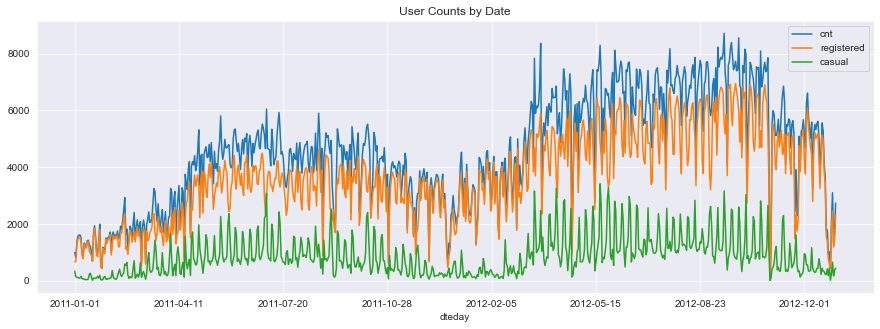

In [139]:
#users counts grouped by day
day = data.groupby('dteday')[['cnt', 'registered', 'casual']].sum()
day.plot(figsize = (15,5), title='User Counts by Date')

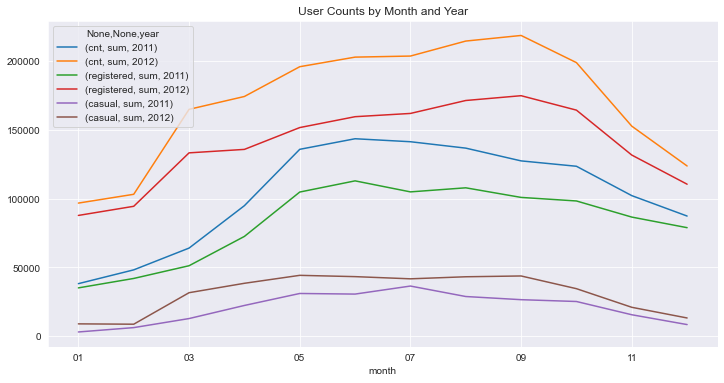

In [145]:
#plot to show user counts by month YOY

#users grouped by day
days_agg = data.groupby('dteday')[['cnt', 'registered', 'casual']].sum()
days_agg = days_agg.reset_index()

#add month and year data
mnths1 = []
years1 = []
for i in range(len(days_agg)):
    years1.append(days_agg.loc[i, 'dteday'][0:4])
    mnths1.append(days_agg.loc[i, 'dteday'][5:7])
    
days_agg['month'] = mnths1
days_agg['year'] = years1

month_agg = days_agg.groupby(['month', 'year']).agg({'cnt': ['sum'], 'registered': ['sum'], 'casual' : 'sum'}).unstack().fillna(0)
month_agg.plot(figsize = (12,6), title = 'User Counts by Month and Year')

### Note on above plot:
* Biggest learning: In 2011, user counts decreased between the months of June and September, but in 2012, user counts increased over the same period  

## Phase 3: Weather Analysis

					Weather by Month


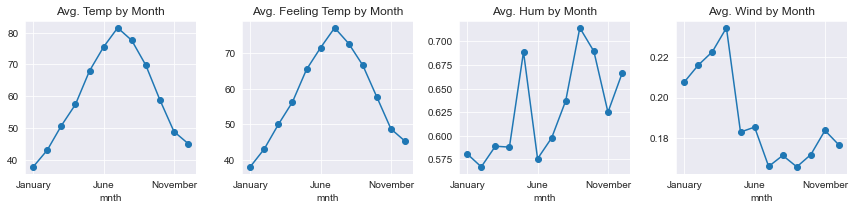


					Weather by Season


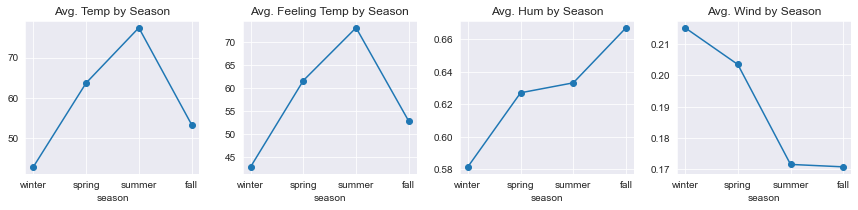


					Weather by Hour


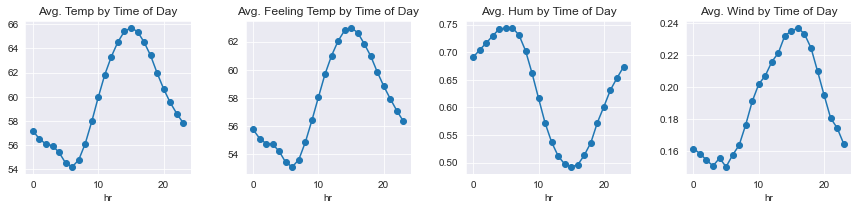


					Weather by Year


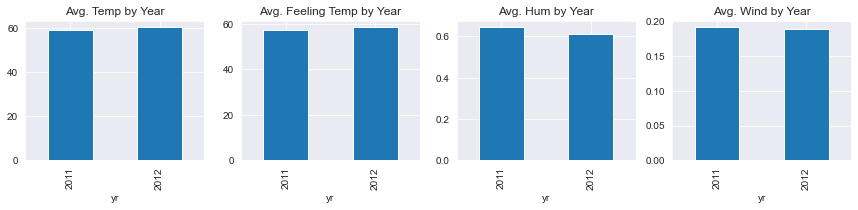

In [141]:

def month(df, column):
    """function to show month aveargaes for weather attributes
    function to show month aveargaes for weather attributes
    output a dataframe with the average of the attribute
    grouped by month"""
    a = df.groupby('mnth')[column].mean()
    a = a.reindex(index = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
    return a

month_temp = month(data, 'temp')
month_atemp = month(data, 'atemp')
month_hum = month(data, 'hum')
month_wind = month(data, 'windspeed')

#Figure to show Weather by Month
fig1, axes = plt.subplots(1,4, figsize = (12,3))
month_temp.plot(ax=axes[0], title = 'Avg. Temp by Month', marker = 'o')
month_atemp.plot(ax=axes[1], title = 'Avg. Feeling Temp by Month', marker = 'o')
month_hum.plot(ax=axes[2], title = 'Avg. Hum by Month', marker = 'o')
month_wind.plot(ax=axes[3], title = 'Avg. Wind by Month', marker = 'o')

print('\t\t\t\t\tWeather by Month')
print('================='*6)
plt.show(fig1.tight_layout(pad=1.0))


#Show weather by Season
print()
print('\t\t\t\t\tWeather by Season')
print('================='*6)

#same as function above, but for season
def season(df, column):
    a = df.groupby('season')[column].mean()
    a = a.reindex(index = ['winter', 'spring', 'summer', 'fall'])
    return a

season_temp = season(data, 'temp')
season_atemp = season(data, 'atemp')
season_hum = season(data, 'hum')
season_wind = season(data, 'windspeed')

#Figure to show Weather by Season
fig2, axes = plt.subplots(1,4, figsize = (12,3))
season_temp.plot(ax=axes[0], title = 'Avg. Temp by Season', marker = 'o')
season_atemp.plot(ax=axes[1], title = 'Avg. Feeling Temp by Season', marker = 'o')
season_hum.plot(ax=axes[2], title = 'Avg. Hum by Season', marker = 'o')
season_wind.plot(ax=axes[3], title = 'Avg. Wind by Season', marker = 'o')

plt.show(fig2.tight_layout(pad=1.0))


#Show weather by Hour
print()
print('\t\t\t\t\tWeather by Hour')
print('================='*6)

hour_temp = data.groupby('hr')['temp'].mean()
hour_atemp = data.groupby('hr')['atemp'].mean()
hour_hum = data.groupby('hr')['hum'].mean()
hour_wind = data.groupby('hr')['windspeed'].mean()

#Figure to show Weather by Hour
fig3, axes = plt.subplots(1,4, figsize = (12,3))
hour_temp.plot(ax=axes[0], title = 'Avg. Temp by Time of Day', marker = 'o')
hour_atemp.plot(ax=axes[1], title = 'Avg. Feeling Temp by Time of Day', marker = 'o')
hour_hum.plot(ax=axes[2], title = 'Avg. Hum by Time of Day', marker = 'o')
hour_wind.plot(ax=axes[3], title = 'Avg. Wind by Time of Day', marker = 'o')

plt.show(fig3.tight_layout(pad=1.0))



#Show weather by Year
print()
print('\t\t\t\t\tWeather by Year')
print('================='*6)

year_temp = data.groupby('yr')['temp'].mean()
year_atemp = data.groupby('yr')['atemp'].mean()
year_hum = data.groupby('yr')['hum'].mean()
year_wind = data.groupby('yr')['windspeed'].mean()

#Figure to show Weather by Hour
fig4, axes = plt.subplots(1,4, figsize = (12,3))
year_temp.plot(ax=axes[0], title = 'Avg. Temp by Year', kind='bar')
year_atemp.plot(ax=axes[1], title = 'Avg. Feeling Temp by Year', kind='bar')
year_hum.plot(ax=axes[2], title = 'Avg. Hum by Year', kind = 'bar')
year_wind.plot(ax=axes[3], title = 'Avg. Wind by Year', kind='bar')

plt.show(fig4.tight_layout(pad=1.0))


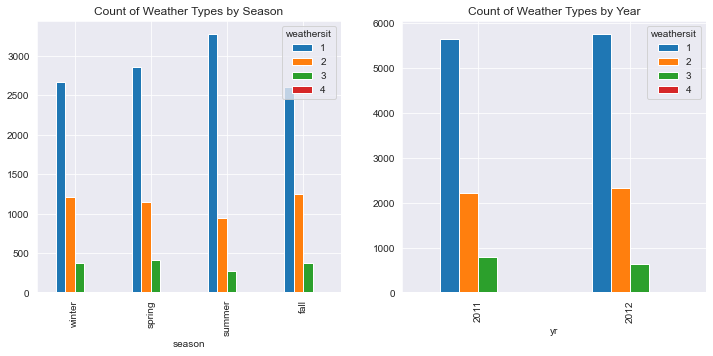

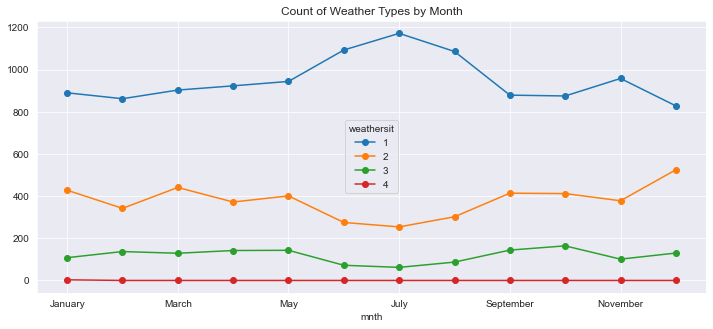

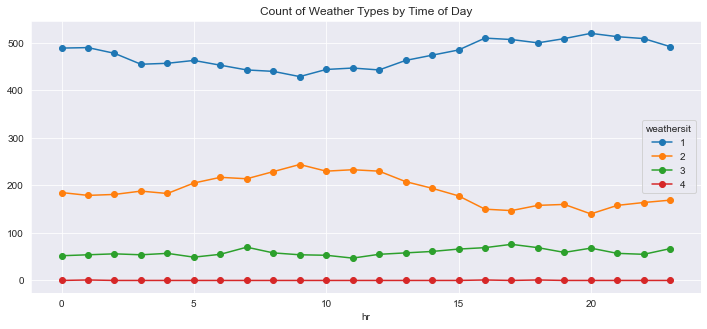

In [142]:
#show counts of weather situatuons by month, season, hour and year

def weather(df, column):
    """Takes as input a dataframe and a column name and outputs the weathersit
    grouped by the column given"""
    a = df.groupby(column, sort=False)['weathersit'].value_counts(sort=False).unstack().fillna(0)
    return a

weather_month = weather(data, 'mnth')
weather_season = weather(data, 'season')
weather_year = weather(data, 'yr')
weather_hour = weather(data, 'hr')

fig4, axes = plt.subplots(1,2, figsize = (12,5))
weather_season.plot(ax=axes[0], kind = 'bar', title= 'Count of Weather Types by Season')
weather_year.plot(ax=axes[1], kind = 'bar', title= 'Count of Weather Types by Year')

plt.show(weather_month.plot(figsize = (12,5), title = 'Count of Weather Types by Month', marker = 'o'))
plt.show(weather_hour.plot(figsize = (12,5), title = 'Count of Weather Types by Time of Day', marker = 'o'))


### Discussion of Weather Analysis
* We can see that temperature, humidity and windspeed are a function of month and season
* April was the windiest month recorded between 2011 and 2012
* Temperature peaks in July and hits its lowest point in January
* Weather is also a function of time of day, with temperature peaking around 4pm, humidity dropping to its lowest
    point at 4pm as well and wind hitting its peak around 5pm
* Weather YOY was slightly better in 2012, with an overall higher avg. temperature, lower avg. humidity and lower
    avg. windspeed per hour (but, these differences are slight and as such, are not likely to be linked to the increase in ridership between 2011 and 2012)

## Phase 4: Top Rider Days

In [143]:

import numpy as np


def topriders(time, n):
    """Function that takes as input a temporal parameter (year or overall) and an n value
    and returns  a dataframe with the days and rider counts for the top n days within the 
    temporal parameter give"""
    if time == 'overall':   
        f = days_agg.nlargest(n, ['cnt'])
        f.index = np.arange(1, len(f)+1)
        f = f.style
        print('Top {} Rider Days {}'.format(n, time.capitalize()))
        display(f)
        return
    if time == 'year':
        a = days_agg[days_agg.year != '2012']
        b = days_agg[days_agg.year != '2011']
        ac = a.nlargest(n, ['cnt'])
        bc = b.nlargest(n, ['cnt'])
        ac.index = np.arange(1, len(ac)+1)
        bc.index = np.arange(1, len(bc)+1)
        ac = ac.style
        bc = bc.style
        print('Top {} Rider Days in 2011'.format(n))
        display(ac)
        print('Top {} Rider Days in 2012'.format(n))
        display(bc)
        return

topriders('year', 5)
print()
topriders('overall', 10)

Top 5 Rider Days in 2011


,dteday,cnt,registered,casual,month,year
1,2011-07-04,6043,2978,3065,07,2011
2,2011-07-16,5923,3505,2418,07,2011
3,2011-08-23,5895,4614,1281,08,2011
4,2011-05-21,5805,3547,2258,05,2011
5,2011-07-15,5538,4220,1318,07,2011


Top 5 Rider Days in 2012


,dteday,cnt,registered,casual,month,year
1,2012-09-15,8714,5554,3160,09,2012
2,2012-09-29,8555,5966,2589,09,2012
3,2012-09-22,8395,5883,2512,09,2012
4,2012-03-23,8362,5893,2469,03,2012
5,2012-05-19,8294,4884,3410,05,2012


Top 10 Rider Days Overall


,dteday,cnt,registered,casual,month,year
1,2012-09-15,8714,5554,3160,09,2012
2,2012-09-29,8555,5966,2589,09,2012
3,2012-09-22,8395,5883,2512,09,2012
4,2012-03-23,8362,5893,2469,03,2012
5,2012-05-19,8294,4884,3410,05,2012
6,2012-09-09,8227,5657,2570,09,2012
7,2012-07-25,8173,6790,1383,07,2012
8,2012-09-21,8167,6917,1250,09,2012
9,2012-10-05,8156,6640,1516,10,2012
10,2012-06-02,8120,5325,2795,06,2012


## Phase 5: Show Correlations

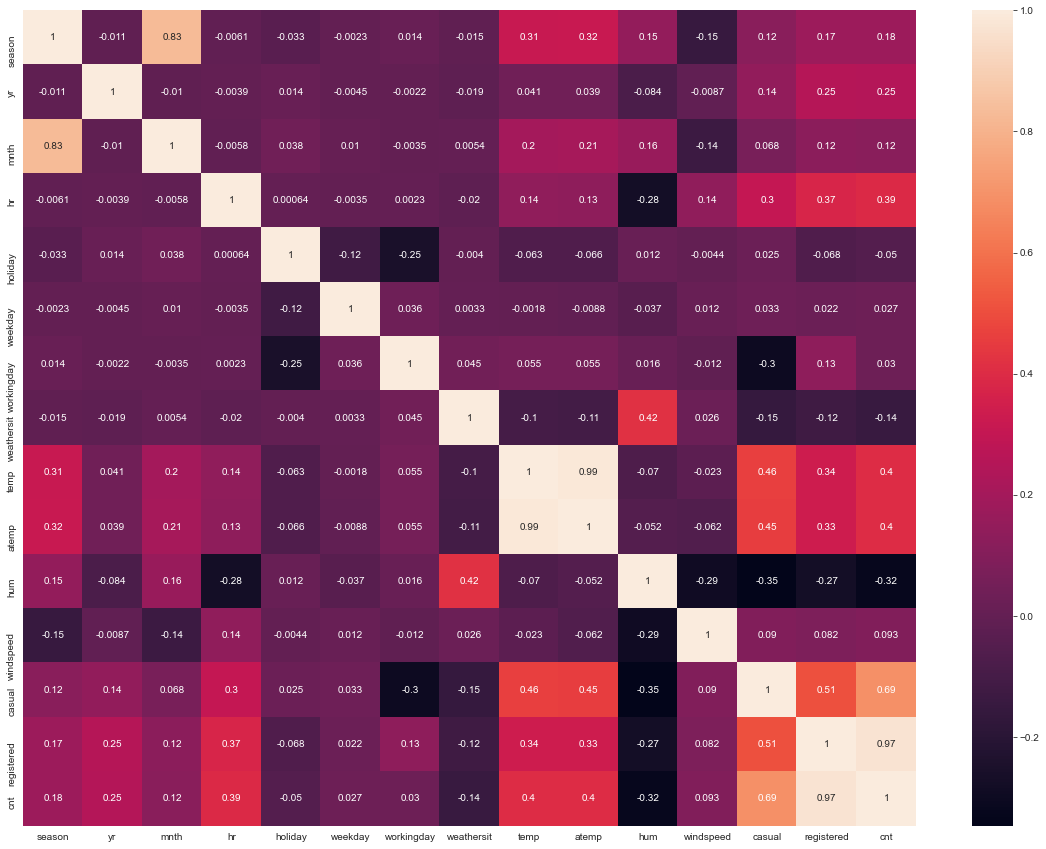

In [150]:
# correlation heatmap for attributes

og_data = dataframe("hour.csv")
og_data.pop('instant')
plt.subplots(figsize=(20,15))
sns.heatmap(og_data.corr(), annot = True)

* Ridership is most closely correlated to temperature and hour of the day

## Phase 6: Conclusions and Discussion

**Main Findings:**
* Casual and registered riders exhibit very different behaviors when using the bike sharing platform
    * Registered riders make up a much larger portion of overall rider instances
    * Registered ridership peaks during morning and evening commuting hours and on workdays
    * Casual ridership peaks midday and on holidays and non-working days, suggesting casual riders are not using the
        platform for commuting, but rather for leisure 
* Attributes most strongly correlated to overall ridership:
    * Overall ridership is most strongly positively correlated with temperature and time of day
    * Overall ridership is most strongly negatively correlated with humidity

**Business Suggestions:** 
* Increase casual ridership: Since the bulk of riders seem to be using the platform for commuting purposes, it would
    be wise to look at levers to pull to increase casual ridership, especially since we know there are 
    underutilized bikes during non-commuting hours
* Converting casual riders to registered riders: What levers can be pulled to coax casual users to behave more like registered users (this suggestion assummes that casual riders have a lower customer lifetime value)

**Future Work:**
* Look at location data: where are the most frequently used docks?
* Look at trip data: how long are riders riding for?
* Look at revenue data: what revenue is associated with each ride? How can revenue be maximized?
 
    